In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import OneClassSVM
import collections


import matplotlib.pyplot as plt

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

In [30]:
#Importing the data set
daily_demand_supply_stock_data_train=pd.read_csv('daily_demand_supply_stock_data_train.csv')
daily_price_data_train=pd.read_csv('daily_price_data_train.csv')
demand_forecast_jan20=pd.read_csv('demand_forecast_jan20.csv')
demand_power_forecast_jan20=pd.read_csv('demand_power_forecast_jan20.csv')
PipelineBookingEntry31012020=pd.read_csv('PipelineBookingEntry31012020.csv')
PipelineBookingExit31012020=pd.read_csv('PipelineBookingExit31012020.csv')
portcalls_M1_forecast_jan20=pd.read_csv('portcalls_M1_forecast_jan20.csv')
TemperatureForecastBarcelona31012020=pd.read_csv('TemperatureForecastBarcelona31012020.csv')
TemperatureForecastMadrid31012020=pd.read_csv('TemperatureForecastMadrid31012020.csv')
TemperatureForecastMalaga31012020=pd.read_csv('TemperatureForecastMalaga31012020.csv')
TemperatureForecastValencia31012020=pd.read_csv('TemperatureForecastValencia31012020.csv')
TemperatureHistoricalBarcelona31122019=pd.read_csv('TemperatureHistoricalBarcelona31122019.csv')
TemperatureHistoricalMadrid31122019=pd.read_csv('TemperatureHistoricalMadrid31122019.csv')
TemperatureHistoricalMalaga31122019=pd.read_csv('TemperatureHistoricalMalaga31122019.csv')
TemperatureHistoricalValencia31122019=pd.read_csv('TemperatureHistoricalValencia31122019.csv')

In [31]:
#Data Wrangling and Exploration

In [32]:
#Droping the columns
daily_demand_supply_stock_data_train=daily_demand_supply_stock_data_train.drop(['Category',
                                                                                'Asset', 'MeasureName','Unit'],axis=1)
spot_price=daily_price_data_train.drop(['Product','TradeDate','DailyTradingVolume [MWh/d]'],axis=1)
PipelineBookingEntry31012020=PipelineBookingEntry31012020.drop(['Units'],axis=1)
TemperatureHistoricalValencia31122019=TemperatureHistoricalValencia31122019.drop(['City'],axis=1)
TemperatureHistoricalMalaga31122019=TemperatureHistoricalMalaga31122019.drop(['City'],axis=1)
TemperatureHistoricalMadrid31122019=TemperatureHistoricalMadrid31122019.drop(['City'],axis=1)
TemperatureHistoricalBarcelona31122019=TemperatureHistoricalBarcelona31122019.drop(['City'],axis=1)
TemperatureForecastValencia31012020=TemperatureForecastValencia31012020.drop(['City'],axis=1)
TemperatureForecastMalaga31012020=TemperatureForecastMalaga31012020.drop(['City'],axis=1)
TemperatureForecastMadrid31012020=TemperatureForecastMadrid31012020.drop(['City'],axis=1)
TemperatureForecastBarcelona31012020=TemperatureForecastBarcelona31012020.drop(['City'],axis=1)
portcalls_M1_forecast_jan20=portcalls_M1_forecast_jan20.drop(['Asset','MeasureName','Unit'],axis=1)
PipelineBookingExit31012020=PipelineBookingExit31012020.drop(['Units'],axis=1)

In [33]:
#1826-Historical Data
TemperatureHistoricalBarcelona31122019=TemperatureHistoricalBarcelona31122019[(TemperatureHistoricalBarcelona31122019['Date']
                                                                               > '2016-01-05')
                                                                              &(TemperatureHistoricalBarcelona31122019['Date']
                                                                                <'2020-01-01')].head(1447)
TemperatureHistoricalMadrid31122019=TemperatureHistoricalMadrid31122019[(TemperatureHistoricalMadrid31122019['Date']
                                                                               > '2016-01-05')
                                                                              &(TemperatureHistoricalMadrid31122019['Date']
                                                                                <'2020-01-01')].head(1447)['Average Temperature']
TemperatureHistoricalMalaga31122019=TemperatureHistoricalMalaga31122019[(TemperatureHistoricalMalaga31122019['Date']
                                                                               > '2016-01-05')
                                                                              &(TemperatureHistoricalMalaga31122019['Date']
                                                                                <'2020-01-01')].head(1447)['Average Temperature']
TemperatureHistoricalValencia31122019=TemperatureHistoricalValencia31122019[(TemperatureHistoricalValencia31122019['Date']
                                                                               > '2016-01-05')
                                                                              &(TemperatureHistoricalValencia31122019['Date']
                                                                                <'2020-01-01')].head(1447)['Average Daily Temperature']
PipelineBookingEntry31012020=PipelineBookingEntry31012020[(PipelineBookingEntry31012020['Date'] > '2016-01-05') 
                                                          &(PipelineBookingEntry31012020['Date']
                                                                                   <'2020-01-01')].head(1447)['RealEntry']
PipelineBookingExit31012020=PipelineBookingExit31012020[(PipelineBookingExit31012020['Date'] > '2016-01-05')
                                                        &(PipelineBookingExit31012020['Date']<'2020-01-01')].head(1447)['RealExit']
daily_demand_supply_stock_data_train=daily_demand_supply_stock_data_train[(daily_demand_supply_stock_data_train['Date'] 
                                                                           > '2016-01-05')
                                                                          &(daily_demand_supply_stock_data_train['Date']
                                                                            <'2020-01-01')].head(1447)['Value']
spot_price=spot_price[spot_price['Date'] > '2015-12-30']['LastPriceDaily [EUR/MWh]']

#Historical dataframe -2016 to 2019
data = [TemperatureHistoricalBarcelona31122019,TemperatureHistoricalMadrid31122019,TemperatureHistoricalMalaga31122019,
TemperatureHistoricalValencia31122019,PipelineBookingEntry31012020,PipelineBookingExit31012020,
daily_demand_supply_stock_data_train,spot_price]
Historical_df = pd. concat(data, axis=1)
#Renaming the columns
Historical_df.rename(columns = {'Date':'Date','Average Temperature':'TemperatureHistoricalBarcelona31122019',
                                'Average Temperature':'TemperatureHistoricalMadrid31122019','Average Temperature':'TemperatureHistoricalMalaga31122019'
                                ,'Average Daily Temperature':'TemperatureHistoricalValencia31122019',
                                'RealEntry':'PipelineBookingEntry31012020','RealExit':'PipelineBookingExit31012020',
                                'Value':'daily_demand_supply_stock_data_train',
                                'LastPriceDaily [EUR/MWh]':'spot_price'}, inplace = True)
Historical_df['is_spot'] = np.where((Historical_df.spot_price <9),0 & (Historical_df.spot_price >9),1)
#31-Forecasts
TemperatureForecastValencia31012020=TemperatureForecastValencia31012020
TemperatureForecastMalaga31012020=TemperatureForecastMalaga31012020['Average Temperature']
TemperatureForecastMadrid31012020=TemperatureForecastMadrid31012020['Average Temperature']
TemperatureForecastBarcelona31012020=TemperatureForecastBarcelona31012020['Average Temperature']
demand_power_forecast_jan20=demand_power_forecast_jan20['GWh']
demand_forecast_jan20=demand_forecast_jan20['GWh']
#The forecast data frame
portcalls_M1_forecast_jan20=portcalls_M1_forecast_jan20=portcalls_M1_forecast_jan20.head(31)['Value']
Data = [TemperatureForecastValencia31012020,TemperatureForecastMalaga31012020,
        TemperatureForecastMadrid31012020,TemperatureForecastBarcelona31012020,
        demand_power_forecast_jan20,demand_forecast_jan20,portcalls_M1_forecast_jan20]
Forecast_20 = pd. concat(Data, axis=1)
#Renaming the columns
Forecast_20.rename(columns = {'Date':'Date','Average Daily Temperature':'TemperatureForecastValencia31012020',
                              'Average Temperature':'TemperatureForecastMalaga31012020',
                              'Average Temperature':'TemperatureForecastMadrid31012020',
                              'Average Temperature':'TemperatureForecastBarcelona31012020',
                              'GWh': 'demand_power_forecast_jan20',
                              'GWh':'demand_forecast_jan20',
                              'Value':'portcalls_M1_forecast_jan20'}, inplace = True)

In [34]:
cols = [c for c in Historical_df.columns if c not in ['Date']]
Historical_df=Historical_df.replace(np.nan,0)

In [35]:
Historical_df.describe()

,TemperatureHistoricalMalaga31122019,TemperatureHistoricalMalaga31122019,TemperatureHistoricalMalaga31122019,TemperatureHistoricalValencia31122019,PipelineBookingEntry31012020,PipelineBookingExit31012020,daily_demand_supply_stock_data_train,spot_price,is_spot
count,3261.000000,3261.000000,3261.000000,3261.000000,3.261000e+03,3.261000e+03,3261.000000,3261.000000,3261.000000
mean,7.469403,6.786645,8.541828,7.970813,6.768391e+07,5.616657e+07,20749.837044,8.624370,0.997853
std,9.312364,9.339626,10.245507,9.827041,7.596369e+07,6.297170e+07,71470.562605,10.324204,0.046289
min,0.000000,-0.765926,0.000000,0.000000,0.000000e+00,0.000000e+00,-967.400000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000
75%,14.626833,12.180000,17.300000,16.029750,1.476451e+08,1.261001e+08,41.000000,17.350000,1.000000
max,30.171250,32.500000,33.900000,32.900000,1.750050e+08,2.463178e+08,504082.000000,43.000000,1.000000


In [36]:
Forecast_20.describe()

,TemperatureForecastValencia31012020,TemperatureForecastBarcelona31012020,TemperatureForecastBarcelona31012020,TemperatureForecastBarcelona31012020,demand_forecast_jan20,demand_forecast_jan20,portcalls_M1_forecast_jan20
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,9.538710,12.241935,6.551613,10.780645,-285.161290,-1051.009677,27935.483871
std,3.025192,1.916033,2.136800,1.580173,70.065254,96.308204,58139.450453
min,5.900000,9.200000,2.800000,8.300000,-350.000000,-1139.000000,0.000000
25%,7.400000,11.100000,5.600000,9.700000,-340.000000,-1123.800000,0.000000
50%,8.700000,11.700000,6.300000,10.400000,-315.000000,-1112.700000,0.000000
75%,11.250000,13.000000,7.300000,12.050000,-257.500000,-971.850000,0.000000
max,16.100000,17.500000,11.300000,14.100000,-140.000000,-851.100000,160000.000000


In [37]:
Historical_df.columns

Index(['Date', 'TemperatureHistoricalMalaga31122019',
       'TemperatureHistoricalMalaga31122019',
       'TemperatureHistoricalMalaga31122019',
       'TemperatureHistoricalValencia31122019', 'PipelineBookingEntry31012020',
       'PipelineBookingExit31012020', 'daily_demand_supply_stock_data_train',
       'spot_price', 'is_spot'],
      dtype='object')

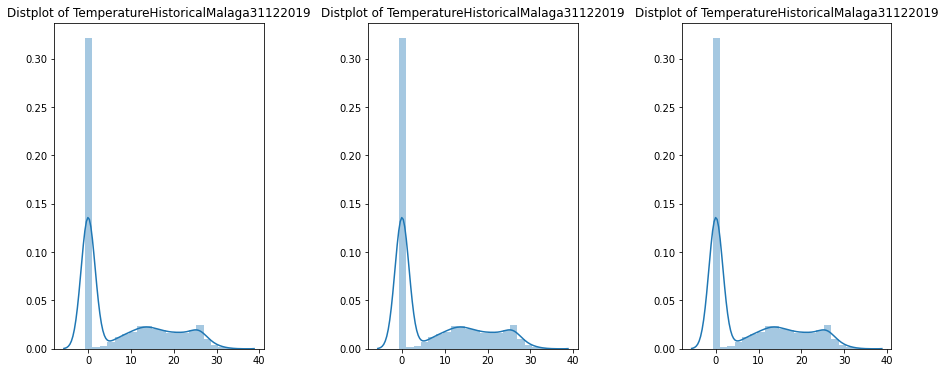

In [38]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['TemperatureHistoricalMalaga31122019',
       'TemperatureHistoricalMalaga31122019',
       'TemperatureHistoricalMalaga31122019']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(Historical_df[x],bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

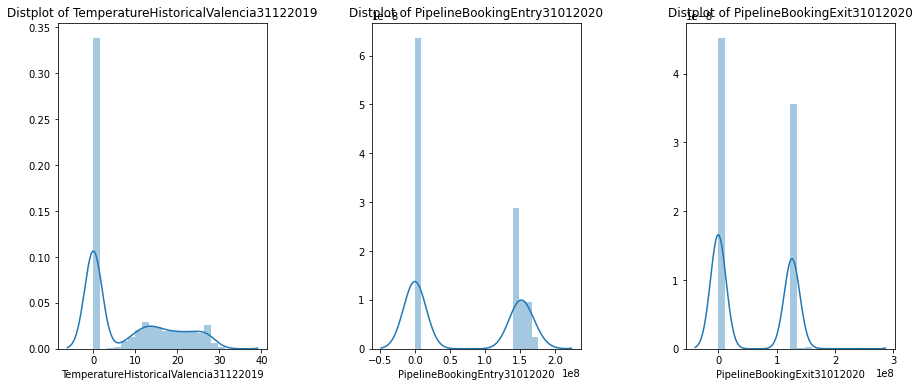

In [39]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['TemperatureHistoricalValencia31122019',
'PipelineBookingEntry31012020',
'PipelineBookingExit31012020']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(Historical_df[x],bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

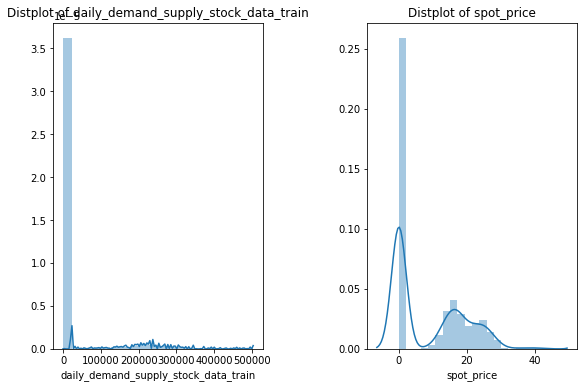

In [40]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['daily_demand_supply_stock_data_train',
'spot_price']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(Historical_df[x],bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [41]:
#Preparing Data for classification
#Identiying the X(Independent) and Y(dependent) variables
from sklearn.model_selection import train_test_split
X = Historical_df.drop(['Date','is_spot'],axis=1)
Y = Historical_df['is_spot']
#Dividing the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 75)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [43]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

96.89

In [44]:
#Correlation coefficints
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
6,spot_price,2.407644e-03
5,daily_demand_supply_stock_data_train,1.846613e-07
1,TemperatureHistoricalMalaga31122019,5.208745e-10
0,TemperatureHistoricalMalaga31122019,3.955777e-10
2,TemperatureHistoricalValencia31122019,-2.378597e-10
3,PipelineBookingEntry31012020,-6.480173e-10
4,PipelineBookingExit31012020,-1.162317e-07


In [45]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

99.71

In [46]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

99.88

In [47]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

56.89

In [48]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

96.89

In [49]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\micha\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


99.71

In [50]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

96.89

In [51]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [52]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [53]:
#Model Evaluation
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
1,KNN,99.88
0,Support Vector Machines,99.71
7,Linear SVC,99.71
2,Logistic Regression,96.89
5,Perceptron,96.89
6,Stochastic Gradient Decent,96.89
4,Naive Bayes,56.89


In [54]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       816

    accuracy                           1.00       816
   macro avg       1.00      1.00      1.00       816
weighted avg       1.00      1.00      1.00       816



In [55]:
#Preparing the submission file
submission = pd.DataFrame({
        "Date": X_test["spot_price"],
        "spot_price": Y_pred
    })

In [56]:
submission.to_csv('submission.csv', index=False)